In [1]:
import tensorflow

In [2]:
import os
import numpy as np
import math
from tensorflow.keras import models, layers

In [3]:
np.random.seed(17)
XY = np.random.random((400, 2)).astype(np.float32) * 4.0 - 2.0

Z = np.array([
    1 if (2*abs(x) <= y and y <= abs(x)+1) else 0
    for [x, y] in XY
], dtype=np.float32)

In [4]:
model = models.Sequential([
    layers.InputLayer(input_shape=(2,)),
    layers.Dense(8, activation='sigmoid', use_bias=True),
    layers.Dense(1, activation='sigmoid', use_bias=False)
])

model.compile(
    loss='mean_squared_error',
    optimizer='adam',
    metrics=['accuracy']
)

In [5]:
if os.path.isfile("smart_duckling.h5"):
    print("Loading existing synapses...")
    model.load_weights("smart_duckling.h5")
else:
    print("Training the duckling...")
    model.fit(
        XY, Z,
        epochs=5000,
        batch_size=50,
        use_multiprocessing=True,
        verbose=False
    )
    model.save("smart_duckling.h5")

print("Done,", model.evaluate(XY, Z))

Training the duckling...
13/13 [==============================] - 0s 2ms/step - loss: 0.0098 - accuracy: 0.9900
Done, [0.009820278733968735, 0.9900000095367432]


79/79 [==============================] - 0s 2ms/step


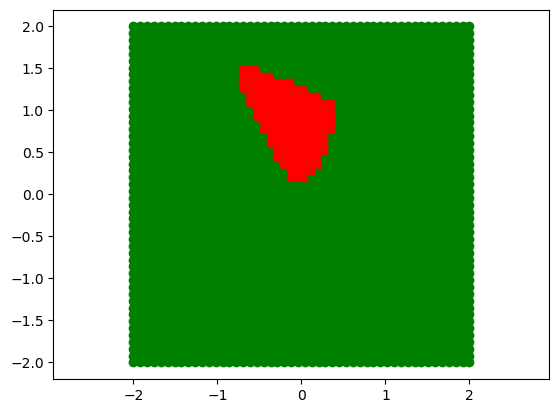

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.axis('equal')

c = np.linspace(-2,2,50)

# https://stackoverflow.com/a/11144716/539470 =)
XY = np.transpose([np.tile(c, len(c)), np.repeat(c, len(c))])

Z = model.predict(XY)

for (x, y), z in zip(XY, Z):
    plt.scatter(x, y, c='red' if z[0] >= 0.5 else 'green')

plt.show()

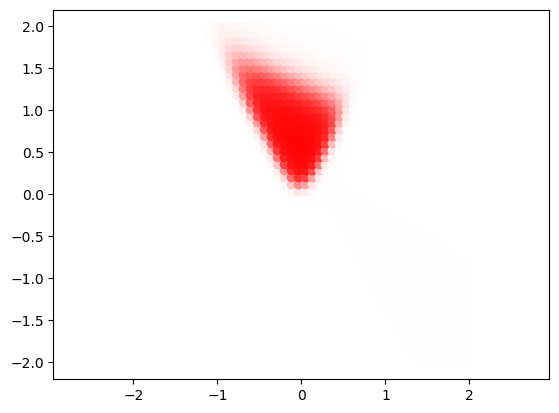

In [7]:
def saturate(v):
    return min(1, max(0, v))

plt.axis('equal')

for (x, y), z in zip(XY, Z):
    plt.scatter(x, y, color=[(1, 1-saturate(z[0]), 1-saturate(z[0]))])

plt.show()